<a href="https://colab.research.google.com/github/asmital/MLDL-CTE-2019/blob/master/Memotion_Fine_tuning_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
import tensorflow.keras.backend as K
from numpy.random import seed
seed(1)
import os
import keras
from skimage import io, transform

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

Using TensorFlow backend.


In [0]:
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls ./drive/My\ Drive/Memotion

data_7000  data_7000_new.csv  Meme_images  Test.csv


In [0]:
dat_folder = "./drive/My Drive/Memotion/data_7000"
before_dat_folder = "./drive/My Drive/Memotion/"
dat_file = "./drive/My Drive/Memotion/data_7000_new.csv"
test_folder="./drive/My Drive/Memotion/Meme_images"
test_file = "./drive/My Drive/Memotion/Test.csv"

In [0]:
cv2.imread(os.path.join(dat_folder,'decaprio_catch-me-if-you-can-oscar-joke.jpe')).shape

(505, 500, 3)

In [0]:
extract = pd.read_csv(dat_file)


In [0]:
n=1
img_name = extract.iloc[n, 0]
classi = extract.iloc[n, 7]
print('Image name: {}'.format(img_name))
print('Motivational or not: {}'.format(classi))
from torch.utils.data import Dataset

Image name: 10_year_10yearchallenge-5c75f8b946e0fb0001edc739.JPG
Motivational or not: not_motivational


In [0]:
class ImageDataset(Dataset):
   

    def __init__(self, csv_file, root_dir, transform=None):
        
        self.extract = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.extract)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.extract.iloc[idx, 0])
        image = io.imread(img_name)
        classi = self.extract.iloc[idx, 7]
        
        sample = {'image': image, 'classi': classi}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [0]:
img_dataset = ImageDataset(csv_file=dat_file,
                                    root_dir=dat_folder)
print(len(img_dataset))

6600


In [0]:
img_dataset2 = ImageDataset(csv_file=test_file,
                                    root_dir=test_folder)
print(len(img_dataset2))
print(img_dataset2[1])

914
{'image': Array([[[170, 169, 164],
        [164, 163, 158],
        [156, 155, 150],
        ...,
        [157, 157, 155],
        [164, 164, 162],
        [168, 168, 166]],

       [[ 38,  37,  32],
        [ 35,  34,  29],
        [ 32,  31,  26],
        ...,
        [ 12,  12,  10],
        [ 19,  19,  17],
        [ 23,  23,  21]],

       [[ 37,  36,  31],
        [ 38,  37,  32],
        [ 39,  38,  33],
        ...,
        [ 11,  11,   9],
        [ 18,  18,  16],
        [ 22,  22,  20]],

       ...,

       [[ 46,  45,  43],
        [ 50,  49,  47],
        [ 49,  48,  46],
        ...,
        [ 71,  54,  46],
        [109,  92,  84],
        [ 94,  77,  69]],

       [[ 46,  42,  41],
        [ 54,  50,  49],
        [ 55,  51,  50],
        ...,
        [114, 100,  91],
        [113,  99,  90],
        [118, 104,  95]],

       [[173, 169, 168],
        [170, 166, 165],
        [151, 147, 146],
        ...,
        [175, 160, 153],
        [165, 150, 143],
        [1

0 (506, 749, 3) motivational
1 (571, 766, 3) not_motivational


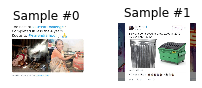

In [0]:
fig = plt.figure()

for i in range(len(img_dataset)):
    sample = img_dataset[i]

    print(i, sample['image'].shape, sample['classi'])

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plt.imshow(sample['image'])

    if i == 1:
        break

In [0]:
   class Rescale(object):
   

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image = sample['image']
        classi=sample['classi']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        y
        

        return {'image': img, 'classi': classi}


class RandomCrop(object):
    

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, xlassi = sample['image'], sample['classi']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        

        return {'image': image, 'classi': classi}




In [0]:
transformed_dataset2 = ImageDataset(csv_file=test_file,
                                           root_dir=test_folder,
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               RandomCrop(224)]))
print(len(transformed_dataset2))

914


In [0]:
transformed_dataset = ImageDataset(csv_file=dat_file,
                                           root_dir=dat_folder,
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               RandomCrop(224)]))
print(len(transformed_dataset))
   

6600


In [0]:
number_classes=2
epochs=20
batchsize=8
feature_extract=True

In [0]:
def trainloop(model, dataloaders, criterion, optimizer, epochs):
  for epoch in range(epochs):
    print("Epoch number ",epoch)
    for phase in ['train', 'val']:
            if phase == 'train':
                model.train() 
            else:
                model.eval() 
            loss=0.0
            win=0.0
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                  outputs = model(inputs)
                  loss = criterion(outputs, labels)
                  _, preds = torch.max(outputs, 1)
                  if phase == 'train':
                        loss.backward()
                        optimizer.step()
                loss += loss.item() * inputs.size(0)
                win+= torch.sum(preds == labels.data)
    epoch_loss =loss / len(dataloaders[phase].dataset)
    epoch_acc = win/ len(dataloaders[phase].dataset)

    print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
  
  return model



In [0]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [0]:

model_ft = models.resnet18(pretrained=True)
set_parameter_requires_grad(model_ft, feature_extract)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, number_classes)
input_size = 224

In [0]:
train_dataset=torch.utils.data.DataLoader(transformed_dataset, batch_size=batchsize, shuffle=True, num_workers=4)

In [0]:
val_dataset=torch.utils.data.DataLoader(transformed_dataset2, batch_size=batchsize, shuffle=True, num_workers=4)
dataloaders_dict={'train':train_dataset,'val':val_dataset}
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:

params_to_update = []
for name,param in model_ft.named_parameters():
      if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)

optimizer = optim.SGD(params_to_update, lr=0.001, momentum=0.9)


	 fc.weight
	 fc.bias


In [0]:
criterion = nn.CrossEntropyLoss()
model_ft, hist = trainloop(model_ft, dataloaders_dict, criterion, optimizer, epochs=epochs)

Epoch number  0


NameError: ignored